<a href="https://colab.research.google.com/github/saranyabandaru91/Projects_DataScience/blob/main/BreastCancerPrediction%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparative Study of various Machine Learning algorithms for Breast Cancer prediction

In [ ]:
#Import the neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data
data = pd.read_csv("data_updated.csv")

In [ ]:
#Printing the first few rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,NaN,122.80,1001.0,0.1184,0.2776,NaN,0.14710,...,NaN,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,NaN,0.11890
1,842517,M,20.57,17.77,NaN,1326.0,NaN,0.1002,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,...,23.57,25.53,152.50,NaN,0.1444,0.4245,NaN,NaN,0.3613,0.08758
3,84348301,M,NaN,20.38,77.58,386.1,0.1425,0.2839,0.2414,NaN,...,14.91,NaN,98.87,567.7,0.2098,NaN,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.1457,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,NaN,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape#Dimension of the data frame

(569, 32)

In [ ]:
data.describe()#Descriptive Statistics

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,529.000000,546.000000,548.000000,533.000000,523.000000,521.000000,543.000000,539.000000,552.000000,...,517.000000,550.000000,563.000000,520.000000,523.000000,546.000000,542.000000,532.000000,527.000000,538.000000
mean,3.037183e+07,14.216845,19.259524,92.084215,649.578987,0.096225,0.104978,0.087063,0.048771,0.180716,...,16.317518,25.596982,107.047975,893.560385,0.132735,0.252812,0.271253,0.113338,0.290327,0.083921
std,1.250206e+08,3.579984,4.284827,24.288435,350.702849,0.014122,0.053365,0.078165,0.039129,0.027477,...,4.825679,6.179229,33.481178,582.829079,0.023109,0.155683,0.207909,0.065122,0.061585,0.018031
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.007830,0.000000,0.000000,0.106000,...,8.678000,12.020000,50.410000,185.200000,0.071170,0.034320,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.740000,16.172500,75.247500,416.200000,0.085855,0.065450,0.029520,0.020310,0.161800,...,13.010000,20.992500,84.035000,515.675000,0.116900,0.147325,0.112975,0.063302,0.251350,0.071318
50%,9.060240e+05,13.430000,18.785000,86.140000,545.200000,0.095780,0.094530,0.059880,0.033260,0.178600,...,14.990000,25.225000,97.660000,688.100000,0.131300,0.211450,0.227450,0.098545,0.282300,0.079900
75%,8.813129e+06,16.130000,21.695000,104.400000,781.000000,0.105100,0.130500,0.125050,0.073520,0.195400,...,19.070000,29.497500,125.050000,1121.750000,0.146450,0.336450,0.379550,0.160750,0.317750,0.092140
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426400,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.info()#To see the every features data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              529 non-null    float64
 3   texture_mean             546 non-null    float64
 4   perimeter_mean           548 non-null    float64
 5   area_mean                533 non-null    float64
 6   smoothness_mean          523 non-null    float64
 7   compactness_mean         521 non-null    float64
 8   concavity_mean           543 non-null    float64
 9   concave points_mean      539 non-null    float64
 10  symmetry_mean            552 non-null    float64
 11  fractal_dimension_mean   529 non-null    float64
 12  radius_se                553 non-null    float64
 13  texture_se               524 non-null    float64
 14  perimeter_se             5

In [ ]:
#Checking the number of null values in every feature
data.isnull().sum()

id                          0
diagnosis                   0
radius_mean                40
texture_mean               23
perimeter_mean             21
area_mean                  36
smoothness_mean            46
compactness_mean           48
concavity_mean             26
concave points_mean        30
symmetry_mean              17
fractal_dimension_mean     40
radius_se                  16
texture_se                 45
perimeter_se               30
area_se                    32
smoothness_se              29
compactness_se             46
concavity_se               40
concave points_se           6
symmetry_se                28
fractal_dimension_se       26
radius_worst               52
texture_worst              19
perimeter_worst             6
area_worst                 49
smoothness_worst           46
compactness_worst          23
concavity_worst            27
concave points_worst       37
symmetry_worst             42
fractal_dimension_worst    31
dtype: int64

C:\Users\91900\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

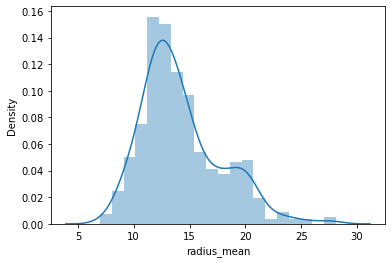

In [ ]:
sns.distplot(data['radius_mean'])#Checking the data distribution of the feature'radius mean'

C:\Users\91900\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

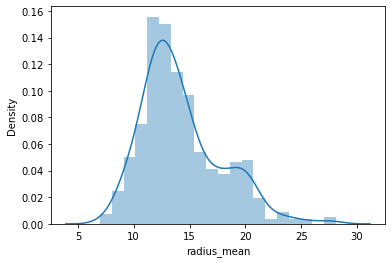

In [ ]:
radius_impute = data['radius_mean'].fillna(data['radius_mean'].mean())#Checking the data distribution of the feature 'radius mean' after imputing it with null values
sns.distplot(data['radius_mean'])

Inference: The distribution after imputing and before imputing does not have much difference.

In [ ]:
means = data.mean()#Getting the mean of every feature

In [ ]:
data.fillna(means,inplace=True)#Filling the null values with mean of the particulat feature

In [ ]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990000,19.259524,122.800000,1001.0,0.118400,0.2776,0.087063,0.147100,...,16.317518,17.330000,184.60,2019.000000,0.162200,0.665600,0.711900,0.265400,0.290327,0.118900
1,842517,M,20.570000,17.770000,92.084215,1326.0,0.096225,0.1002,0.086900,0.070170,...,24.990000,23.410000,158.80,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.083921
2,84300903,M,19.690000,21.250000,130.000000,1203.0,0.109600,0.1599,0.197400,0.127900,...,23.570000,25.530000,152.50,893.560385,0.144400,0.424500,0.271253,0.113338,0.361300,0.087580
3,84348301,M,14.216845,20.380000,77.580000,386.1,0.142500,0.2839,0.241400,0.048771,...,14.910000,25.596982,98.87,567.700000,0.209800,0.252812,0.686900,0.257500,0.663800,0.173000
4,84358402,M,20.290000,14.340000,135.100000,1297.0,0.100300,0.1457,0.198000,0.104300,...,22.540000,16.670000,152.20,1575.000000,0.132735,0.205000,0.400000,0.162500,0.236400,0.076780


In [ ]:
data.mean()

id                         3.037183e+07
radius_mean                1.421684e+01
texture_mean               1.925952e+01
perimeter_mean             9.208422e+01
area_mean                  6.495790e+02
smoothness_mean            9.622533e-02
compactness_mean           1.049779e-01
concavity_mean             8.706317e-02
concave points_mean        4.877089e-02
symmetry_mean              1.807165e-01
fractal_dimension_mean     6.283775e-02
radius_se                  4.036613e-01
texture_se                 1.223568e+00
perimeter_se               2.897406e+00
area_se                    4.021844e+01
smoothness_se              7.027543e-03
compactness_se             2.541915e-02
concavity_se               3.231834e-02
concave points_se          1.178870e-02
symmetry_se                2.044377e-02
fractal_dimension_se       3.786815e-03
radius_worst               1.631752e+01
texture_worst              2.559698e+01
perimeter_worst            1.070480e+02
area_worst                 8.935604e+02


In [ ]:
data.std()

id                         1.250206e+08
radius_mean                3.451628e+00
texture_mean               4.197177e+00
perimeter_mean             2.383521e+01
area_mean                  3.394071e+02
smoothness_mean            1.353772e-02
compactness_mean           5.106074e-02
concavity_mean             7.635521e-02
concave points_mean        3.808150e-02
symmetry_mean              2.706284e-02
fractal_dimension_mean     6.944606e-03
radius_se                  2.745103e-01
texture_se                 5.380375e-01
perimeter_se               1.987907e+00
area_se                    4.486268e+01
smoothness_se              2.918045e-03
compactness_se             1.729527e-02
concavity_se               2.953150e-02
concave points_se          6.111217e-03
symmetry_se                7.947877e-03
fractal_dimension_se       2.600691e-03
radius_worst               4.599484e+00
texture_worst              6.075001e+00
perimeter_worst            3.330387e+01
area_worst                 5.571225e+02


In [ ]:
from statsmodels import robust#To use robust mean absolute deviation
robust.scale.mad(data.radius_mean)

2.7724661486054747

In [ ]:
#The interquartile range of the data features
data.quantile(0.75)-data.quantile(0.25)

id                         7.943911e+06
radius_mean                3.860000e+00
texture_mean               5.260000e+00
perimeter_mean             2.806000e+01
area_mean                  3.211000e+02
smoothness_mean            1.723000e-02
compactness_mean           6.108000e-02
concavity_mean             9.010000e-02
concave points_mean        4.787000e-02
symmetry_mean              3.300000e-02
fractal_dimension_mean     7.640000e-03
radius_se                  2.343000e-01
texture_se                 6.009000e-01
perimeter_se               1.601000e+00
area_se                    2.499000e+01
smoothness_se              2.756000e-03
compactness_se             1.716000e-02
concavity_se               2.409000e-02
concave points_se          6.989000e-03
symmetry_se                7.600000e-03
fractal_dimension_se       2.145000e-03
radius_worst               4.960000e+00
texture_worst              8.080000e+00
perimeter_worst            4.079000e+01
area_worst                 5.013000e+02


In [ ]:
from dataprep.eda import create_report

create_report(data)

ModuleNotFoundError: No module named 'dataprep'

##### Data Distributions

#### Box Plot

In [ ]:
data.quantile([0.05,0.1,0.25,0.75])#finding the quantiles of the features

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0.05,90267.0,9.6674,13.128,61.132,275.78,0.075534,0.041476,0.004983,0.005706,0.14150,...,10.658,16.574,67.856,338.70,0.097442,0.071764,0.019824,0.025640,0.21582,0.062726
0.10,853155.4,10.4800,14.150,66.700,323.68,0.080086,0.050500,0.013954,0.011362,0.14958,...,11.460,17.800,72.178,394.04,0.103780,0.095398,0.048170,0.039886,0.22816,0.065914
0.25,869218.0,11.8500,16.330,75.540,423.60,0.086770,0.067220,0.030000,0.020740,0.16200,...,13.140,21.180,84.110,523.70,0.118500,0.148600,0.118600,0.065280,0.25400,0.072200
0.75,8813129.0,15.7100,21.590,103.600,744.70,0.104000,0.128300,0.120100,0.068610,0.19500,...,18.100,29.260,124.900,1025.00,0.144900,0.325100,0.375900,0.156100,0.31470,0.091800


5%, 10%, 25% and 75% of the features values

Text(0, 0.5, 'Radius Mean ')

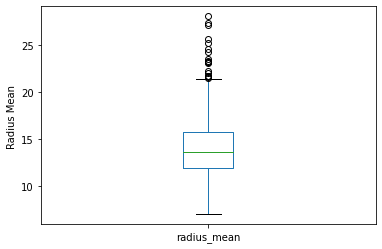

In [ ]:
ax =  data['radius_mean'].plot.box()#Plotting the box plot to see the outliers of data
ax.set_ylabel("Radius Mean ")

Inference: There are number of outliers in the feature 'Radius Mean'

In [ ]:
Radius_mean_IQR = data['radius_mean'].quantile(0.75) - data['radius_mean'].quantile(0.25)#Finding the InterQaurtile Range
Radius_mean_IQR

3.860000000000001

In [ ]:
q1, q3 = np.percentile(data['radius_mean'], [25, 75])#Finding the first quartile and 3 rd quartile

In [ ]:
outlier_cutoff = 1.5 * Radius_mean_IQR#The cut off is 1.5 times the IQR
lower_cutoff = q1 - outlier_cutoff#Lower Cut off is the difference between the Q1 and outlier cut off
upper_cutoff = q3 + outlier_cutoff#Upper Cut off is the su of  the Q3 and outlier cut off

Inference: Any values below the lower cut off or above the upper cut off will be considered as outlier

In [ ]:
Radius_mean_outliers = len([x for x in data['radius_mean'] if x < lower_cutoff or x > upper_cutoff])#Findging the outliers
print(Radius_mean_outliers)
Radius_mean_outliers/len(data['radius_mean'])


18


0.03163444639718805

Inference : the number of outliers in radius_mean is 18 and that is 3.16% of the total values

#### Note: *We are not removing the outliers as of now, because these maybe genuine outliers and removing them may result in loss of important information.*

In [ ]:
#Finding IQR of the every feature
IQR = data.quantile(0.75) - data.quantile(0.25)
IQR

id                         7.943911e+06
radius_mean                3.860000e+00
texture_mean               5.260000e+00
perimeter_mean             2.806000e+01
area_mean                  3.211000e+02
smoothness_mean            1.723000e-02
compactness_mean           6.108000e-02
concavity_mean             9.010000e-02
concave points_mean        4.787000e-02
symmetry_mean              3.300000e-02
fractal_dimension_mean     7.640000e-03
radius_se                  2.343000e-01
texture_se                 6.009000e-01
perimeter_se               1.601000e+00
area_se                    2.499000e+01
smoothness_se              2.756000e-03
compactness_se             1.716000e-02
concavity_se               2.409000e-02
concave points_se          6.989000e-03
symmetry_se                7.600000e-03
fractal_dimension_se       2.145000e-03
radius_worst               4.960000e+00
texture_worst              8.080000e+00
perimeter_worst            4.079000e+01
area_worst                 5.013000e+02


In [ ]:
q1, q3 = np.percentile(data.drop(['id','diagnosis'],axis=1), [25, 75]) #Finding the first quartile and 3 rd quartile
q1,q3

(0.055502499999999996, 15.11)

In [ ]:
outlier_cutoff = 1.5 * Radius_mean_IQR#The cut off is 1.5 times the IQR
lower_cutoff = q1 - outlier_cutoff
upper_cutoff = q3 + outlier_cutoff


In [ ]:
data_outliers = data.drop(['id','diagnosis'],axis=1)#We are dropping the ID column and the diagnosis column so we can find the outliers of all other features at once



In [ ]:
#Finding the outliers in every feature of the data frame
q1 = data_outliers.quantile(0.25)
q3 = data_outliers.quantile(0.75)

iqr = q3 - q1
lower_cutoff = q1 - 1.5*iqr
upper_cutoff = q3 + 1.5*iqr
outliers = data_outliers.apply(lambda x: x[(x < lower_cutoff[x.name]) | (x > upper_cutoff[x.name])], axis=0)

In [ ]:
(len(outliers)-outliers.isnull().sum())#Finding the number of outliers in every feature

radius_mean                18
texture_mean                8
perimeter_mean             15
area_mean                  44
smoothness_mean             9
compactness_mean           22
concavity_mean             20
concave points_mean        19
symmetry_mean              16
fractal_dimension_mean     23
radius_se                  44
texture_se                 20
perimeter_se               42
area_se                    65
smoothness_se              30
compactness_se             35
concavity_se               31
concave points_se          19
symmetry_se                30
fractal_dimension_se       31
radius_worst               28
texture_worst               8
perimeter_worst            16
area_worst                 45
smoothness_worst           15
compactness_worst          22
concavity_worst            13
concave points_worst        0
symmetry_worst             28
fractal_dimension_worst    22
dtype: int64

Text(0, 0.5, 'Radius Mean')

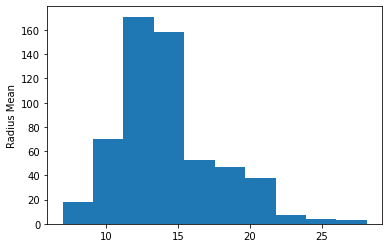

In [ ]:
#Histogram of radius mean
ax = (data['radius_mean']).plot.hist()
ax.set_ylabel("Radius Mean")

Text(0, 0.5, 'texture_mean ')

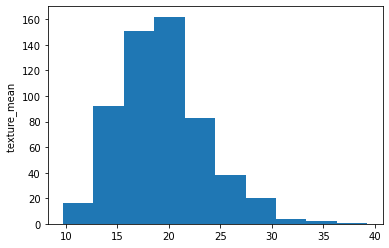

In [ ]:
#Histogram of texture mean
ax = (data['texture_mean']).plot.hist()
ax.set_ylabel("texture_mean ")

Text(0, 0.5, 'perimeter_mean')

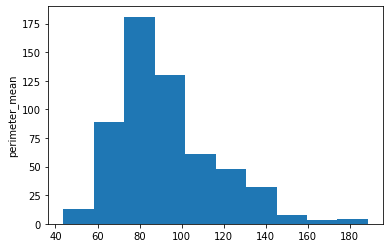

In [ ]:
#Histogram of perimeter mean
ax = (data['perimeter_mean']).plot.hist()
ax.set_ylabel("perimeter_mean")

Text(0, 0.5, 'area_mean')

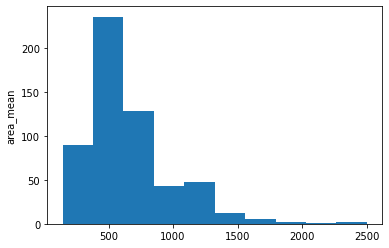

In [ ]:
#Histogram of area mean
ax = (data['area_mean']).plot.hist()
ax.set_ylabel("area_mean")

C:\Users\91900\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


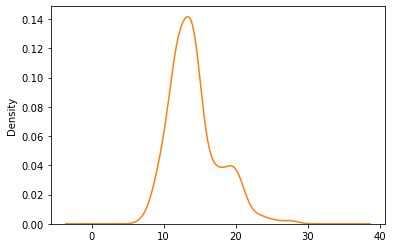

In [ ]:
#Density Plot of radius mean
ax = (data['radius_mean']).plot.hist(density=True,bins=range(1,7))
(data['radius_mean']).plot.density(ax=ax)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


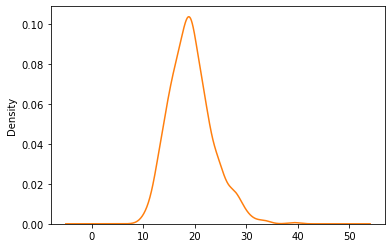

In [ ]:
#Density Plot fo texture mean
ax = (data['texture_mean']).plot.hist(density=True,bins=range(1,7))
(data['texture_mean']).plot.density(ax=ax)
plt.show()

In [ ]:
ans = data.diagnosis.value_counts()
ans

0    357
1    212
Name: diagnosis, dtype: int64

C:\Users\91900\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


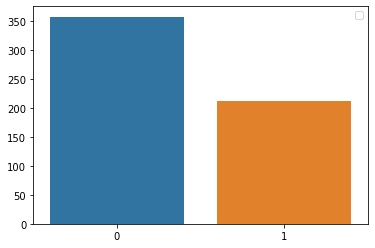

In [ ]:
#Bar plot of the feature diagnosis which is the target variable
sns.barplot(ans.index,ans.values)
plt.legend()
plt.show()

In [ ]:
#Encoding the target variable to a numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [ ]:
correlation = data.corr()#Findign the correlation of every feature

In [ ]:
target = abs(correlation['diagnosis'])#Finding the correlation of every feature with the feature 'diagnosis'

In [ ]:
relevant_features = target[target>0.5].index#Finding the relevant features that is the features which have a  absolute correlation greater than 0.5
len(relevant_features)

16

Inference: There are 16 features that have an absolute correlation greater than 0.5

In [ ]:
df = data[relevant_features] #Creating a new dataframe from 'data' which contains only relevant features
df

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.990000,122.800000,1001.0,0.27760,0.087063,0.147100,0.403661,8.589000,153.40,16.317518,184.60,2019.000000,0.665600,0.711900,0.265400
1,1,20.570000,92.084215,1326.0,0.10020,0.086900,0.070170,0.543500,2.897406,74.08,24.990000,158.80,1956.000000,0.186600,0.241600,0.186000
2,1,19.690000,130.000000,1203.0,0.15990,0.197400,0.127900,0.745600,4.585000,94.03,23.570000,152.50,893.560385,0.424500,0.271253,0.113338
3,1,14.216845,77.580000,386.1,0.28390,0.241400,0.048771,0.495600,3.445000,27.23,14.910000,98.87,567.700000,0.252812,0.686900,0.257500
4,1,20.290000,135.100000,1297.0,0.14570,0.198000,0.104300,0.757200,5.438000,94.44,22.540000,152.20,1575.000000,0.205000,0.400000,0.162500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.560000,92.084215,1479.0,0.11590,0.243900,0.138900,1.176000,7.673000,158.70,25.450000,166.10,893.560385,0.211300,0.410700,0.221600
565,1,20.130000,131.200000,1261.0,0.10340,0.144000,0.097910,0.765500,5.203000,99.04,16.317518,155.00,1731.000000,0.192200,0.321500,0.162800
566,1,16.600000,92.084215,858.1,0.10230,0.092510,0.053020,0.456400,3.425000,48.55,18.980000,126.70,1124.000000,0.309400,0.340300,0.141800
567,1,20.600000,140.100000,1265.0,0.27700,0.351400,0.152000,0.726000,5.772000,86.22,25.740000,184.60,1821.000000,0.868100,0.938700,0.113338


In [ ]:
y = df['diagnosis']#Saving the target variable
df = df.drop('diagnosis',axis=1)#Dropping the the target variable

In [ ]:
multi = df.corr()
multicolinear  = multi[multi>0.5].index#Finding the relevant features that is the features which have a  absolute correlation greater than 0.5
multicolinear

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

Inference: We can see that there are features with multicolienarity . So we should use PCA to reduce the dimension and hence remove multicolinearity. Before doing PCA we should stanfardize the features so they will have same variance.

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [ ]:
#After scaling the resulting data structure will be a numpy array. So we are converting it back to dataframe
X = pd.DataFrame(X_scaled)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.094114e+00,1.289806e+00,1.036308,3.383696,7.276517e-16,2.584342e+00,8.095870e-16,2.865628e+00,2.525064,-1.546191e-15,2.330668,2.021871,2.709223e+00,2.173580e+00,2.417151e+00
1,1.842245e+00,2.386949e-15,1.994702,-0.093655,-2.138851e-03,5.624235e-01,5.098597e-01,-1.788736e-15,0.755447,1.887193e+00,1.555301,1.908690,-4.345669e-01,-1.462687e-01,1.155019e+00
2,1.587069e+00,1.592146e+00,1.631987,1.076570,1.446318e+00,2.079716e+00,1.246727e+00,8.496772e-01,1.200528,1.578191e+00,1.365968,0.000000,1.126827e+00,-2.738199e-16,2.205994e-16
3,1.545288e-15,-6.090559e-01,-0.776975,3.507187,2.023079e+00,-1.458976e-15,3.352136e-01,2.757051e-01,-0.289770,-3.062858e-01,-0.245772,-0.585414,1.457331e-15,2.050263e+00,2.291573e+00
4,1.761053e+00,1.806304e+00,1.909184,0.798225,1.454183e+00,1.459448e+00,1.289022e+00,1.279149e+00,1.209675,1.354056e+00,1.356952,1.224218,-3.138034e-01,6.350710e-01,7.814663e-01


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the scaled independent variables
pca = PCA(n_components=5)
pca.fit(X)

# Get the principal components
components = pca.components_

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_
components

array([[ 0.28025288,  0.28414075,  0.27549136,  0.21869128,  0.25852858,
         0.28305042,  0.24246374,  0.24500398,  0.24646313,  0.2764187 ,
         0.29100143,  0.27885353,  0.18904781,  0.21872652,  0.26087919],
       [ 0.15304849,  0.12703675,  0.19233298, -0.38028353, -0.25012608,
        -0.1129544 ,  0.25706867,  0.21113261,  0.26762212,  0.13047711,
         0.09650624,  0.17564531, -0.47679403, -0.42318524, -0.24003823],
       [-0.26933894, -0.24632553, -0.21215474,  0.20420022,  0.15381659,
         0.01119767,  0.45490352,  0.47978197,  0.38448483, -0.27606291,
        -0.21505305, -0.1785419 ,  0.03957473,  0.02929505, -0.12071175],
       [ 0.1470799 ,  0.14762195,  0.11796032,  0.30160804,  0.43069064,
         0.42912989, -0.06718215, -0.11874158, -0.15041749, -0.15825774,
        -0.15872171, -0.21029468, -0.53672236, -0.14034132, -0.19641635],
       [-0.038082  , -0.11377359, -0.03642998, -0.61947854,  0.44165377,
        -0.05864069,  0.05540726, -0.04864666, 

In [ ]:
explained_variance_ratios

array([0.70374779, 0.1386346 , 0.06617466, 0.02085245, 0.01650623])

In [ ]:
X_transformed =  pca.transform(X_scaled)#Transforming using PCA

X_transformed = pd.DataFrame(X_transformed)

In [ ]:
#X_transformed.to_csv("BreastCancerPredictionEDA.csv")

# Model Building

# 1. Naive Bayes Classifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes classifier on the training set
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())


GaussianNB()

In [ ]:
predictions = classifier_nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate precision
precision = precision_score(y_test, predictions)

# Calculate recall
recall = recall_score(y_test, predictions)

# Calculate F1 score
f1 = f1_score(y_test, predictions)

# Display the evaluation metrics
print('Accuracy for the naive bayes classifier is:', accuracy*100 , '%')



Accuracy for the naive bayes classifier is: 95.6140350877193 %


In [ ]:
# Predicting Cross Validation Score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.9030917874396136
Training set:  0.9032967032967033
Test set:  0.956140350877193


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]

In [ ]:
confusion_matrix(y_test, y_pred_nb_test)

array([[70,  1],
       [ 4, 39]], dtype=int64)

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


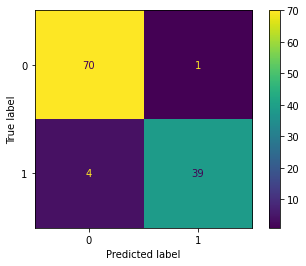

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plot_confusion_matrix(classifier_nb, X_test, y_test)
plt.show()


C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


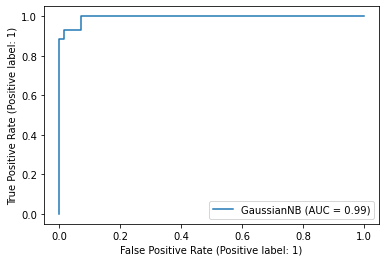

In [ ]:
from sklearn.metrics import roc_curve, plot_roc_curve

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot the ROC curve
plot_roc_curve(classifier_nb, X_test, y_test)
plt.show()


C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


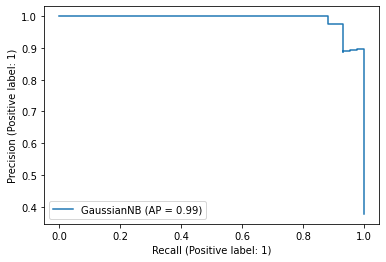

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

# Compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# Plot the precision-recall curve
plot_precision_recall_curve(classifier_nb, X_test, y_test)
plt.show()


# 2. Logistic Regression

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [ ]:
# Predicting Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.9340579710144927
Training set:  0.9340659340659341
Test set:  0.9736842105263158


In [ ]:
confusion_matrix(y_test, y_pred_lr_test)

array([[71,  0],
       [ 3, 40]], dtype=int64)

In [ ]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

Accuracy for the logistic regression classifier is: 97.36842105263158 %


C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


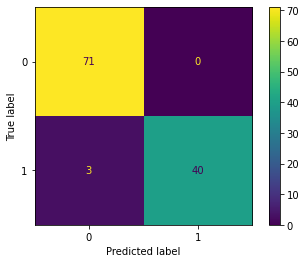

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_test)
ac_lr = accuracy_score(y_test, y_pred_lr_test)
print('Accuracy for the logistic regression classifier is:', ac_lr*100 , '%')

#plot the confusion matrix
plot_confusion_matrix(classifier_lr, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


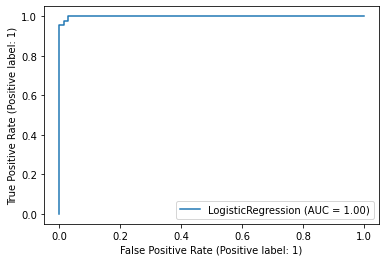

In [ ]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_test)

# Plot the ROC curve
plot_roc_curve(classifier_lr, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


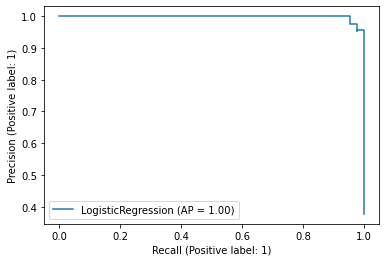

In [ ]:
# Compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr_test)

# Plot the precision-recall curve
plot_precision_recall_curve(classifier_lr, X_test, y_test)
plt.show()


# 3. KNN Classifier

In [ ]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [ ]:
# Predicting Cross Validation Score
cv_knn = cross_val_score(estimator = classifier_knn, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.9143961352657005
Training set:  1.0
Test set:  0.956140350877193


In [ ]:
confusion_matrix(y_test, y_pred_knn_test)

array([[70,  1],
       [ 4, 39]], dtype=int64)

In [ ]:
tp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,0]
fp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,1]
tn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,1]
fn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,0]

Accuracy for the knn classifier is: 95.6140350877193 %


C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


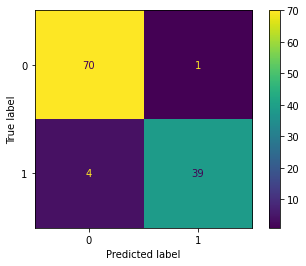

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn_test)
ac_knn = accuracy_score(y_test, y_pred_knn_test)
print('Accuracy for the knn classifier is:', ac_knn*100 , '%')
# Plot the confusion matrix
plot_confusion_matrix(classifier_knn, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


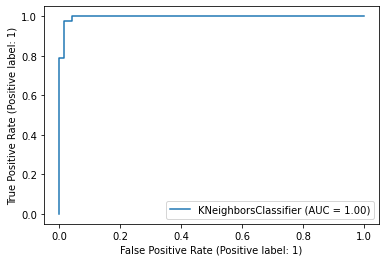

In [ ]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_test)

# Plot the ROC curve
plot_roc_curve(classifier_knn, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


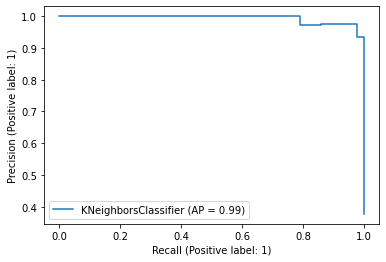

In [ ]:
# Compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_knn_test)

# Plot the precision-recall curve
plot_precision_recall_curve(classifier_knn, X_test, y_test)
plt.show()

# 4. Support vector machine - SVM(RBF)

In [ ]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC(kernel = 'rbf', C = 10, tol = 0.001, gamma = 'scale')
classifier_svm_kernel.fit(X_train, y_train.ravel())

SVC(C=10)

In [ ]:
# Predicting Cross Validation Score
cv_svm_kernel = cross_val_score(estimator = classifier_svm_kernel, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_kernel.mean())

y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

CV:  0.9229951690821256
Training set:  0.9538461538461539
Test set:  0.956140350877193


In [ ]:
confusion_matrix(y_test, y_pred_svm_kernel_test)

array([[69,  2],
       [ 3, 40]], dtype=int64)

In [ ]:
tp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,0]
fp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,1]
tn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,1]
fn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,0]

Accuracy for the svm classifier with rbf kernel is: 95.6140350877193 %


C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


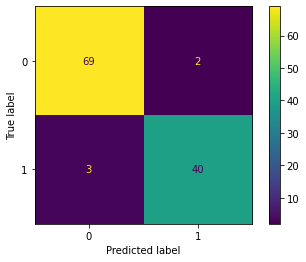

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_kernel_test)
ac_svm2 = accuracy_score(y_test, y_pred_svm_kernel_test)
print('Accuracy for the svm classifier with rbf kernel is:', ac_svm2*100 , '%')
# Plot the confusion matrix
plot_confusion_matrix(classifier_svm_kernel, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


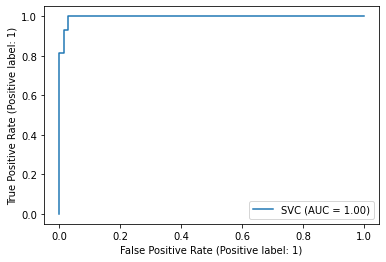

In [ ]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_kernel_test)

# Plot the ROC curve
plot_roc_curve(classifier_svm_kernel, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


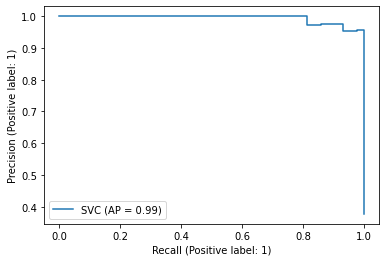

In [ ]:
# Compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_svm_kernel_test)

# Plot the precision-recall curve
plot_precision_recall_curve(classifier_svm_kernel, X_test, y_test)
plt.show()

# 5. Decision tree classification

In [ ]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=5, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train, y_train.ravel())

DecisionTreeClassifier(max_features=5, max_leaf_nodes=400, random_state=33)

In [ ]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.8966666666666667
Training set:  1.0
Test set:  0.9473684210526315


In [ ]:
confusion_matrix(y_test, y_pred_dt_test)

array([[68,  3],
       [ 3, 40]], dtype=int64)

In [ ]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

Accuracy for the dt classifier is: 94.73684210526315 %


C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


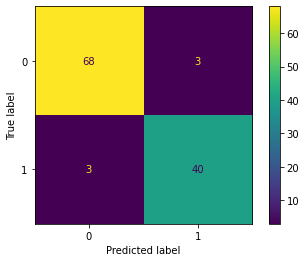

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_test)
ac_dt = accuracy_score(y_test, y_pred_dt_test)
print('Accuracy for the dt classifier is:', ac_dt*100 , '%')
# Plot the confusion matrix
plot_confusion_matrix( classifier_dt, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


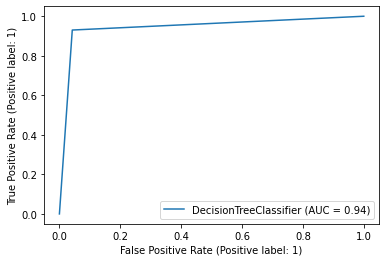

In [ ]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_test)

# Plot the ROC curve
plot_roc_curve(classifier_dt, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


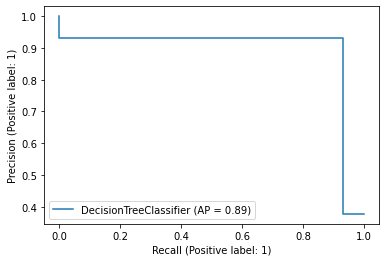

In [ ]:
# Compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt_test)

# Plot the precision-recall curve
plot_precision_recall_curve(classifier_dt, X_test, y_test)
plt.show()

# 6. Random Forest Classification

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=33)

In [ ]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.9230434782608696
Training set:  1.0
Test set:  0.9649122807017544


In [ ]:
confusion_matrix(y_test, y_pred_rf_test)

array([[69,  2],
       [ 2, 41]], dtype=int64)

In [ ]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

Accuracy for the rf classifier is: 96.49122807017544 %


C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


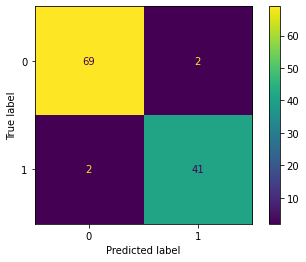

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_test)
ac_rf = accuracy_score(y_test, y_pred_rf_test)
print('Accuracy for the rf classifier is:', ac_rf*100 , '%')
# Plot the confusion matrix
plot_confusion_matrix( classifier_rf, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


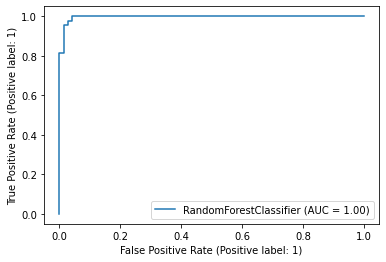

In [ ]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_test)

# Plot the ROC curve
plot_roc_curve(classifier_rf, X_test, y_test)
plt.show()

C:\Users\91900\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


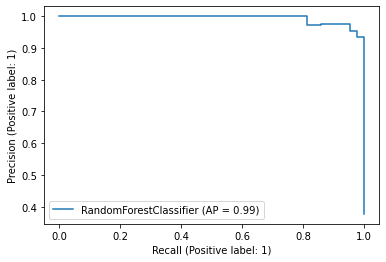

In [ ]:
# Compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf_test)

# Plot the precision-recall curve
plot_precision_recall_curve(classifier_rf, X_test, y_test)
plt.show()

# Measuring the error

In [ ]:
models = [('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test, cv_nb.mean()),
          ('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('SVM (RBF)', tp_svm_kernel, fp_svm_kernel, tn_svm_kernel, fn_svm_kernel, accuracy_svm_kernel_train, accuracy_svm_kernel_test, cv_svm_kernel.mean()),
          ('Decision Tree Classifier', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('Random Forest Classifier', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test, cv_rf.mean())
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(train)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(train),Accuracy(test),Cross-Validation
0,Naive Bayes,70,1,39,4,0.903297,0.956140,0.903092
1,Logistic Regression,71,0,40,3,0.934066,0.973684,0.934058
2,K-Nearest Neighbors (KNN),70,1,39,4,1.000000,0.956140,0.914396
3,SVM (RBF),69,2,40,3,0.953846,0.956140,0.922995
4,Decision Tree Classifier,68,3,40,3,1.000000,0.947368,0.896667
5,Random Forest Classifier,69,2,41,2,1.000000,0.964912,0.923043


# Visualizing model performances

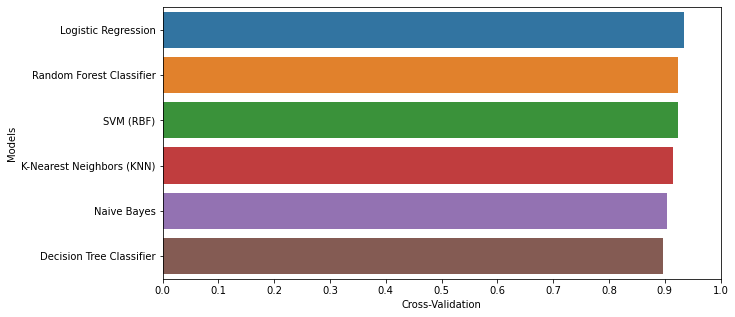

In [ ]:
f, axe = plt.subplots(1,1, figsize=(10,5))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validation')
axe.set_ylabel('Models')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

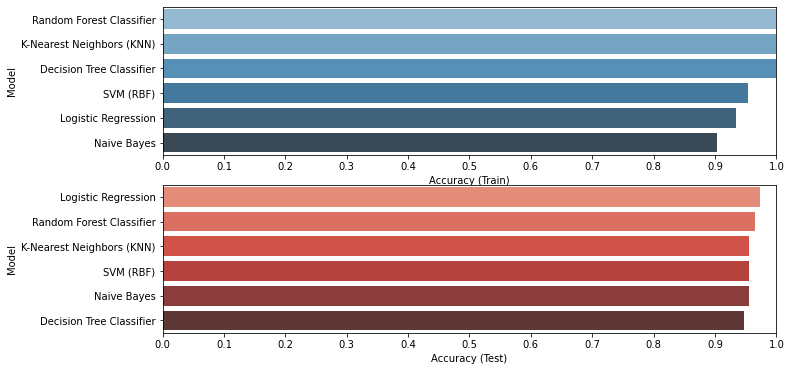

In [ ]:
f, axes = plt.subplots(2,1, figsize=(11,6))

predict.sort_values(by=['Accuracy(train)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(train)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Train)')
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)')
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

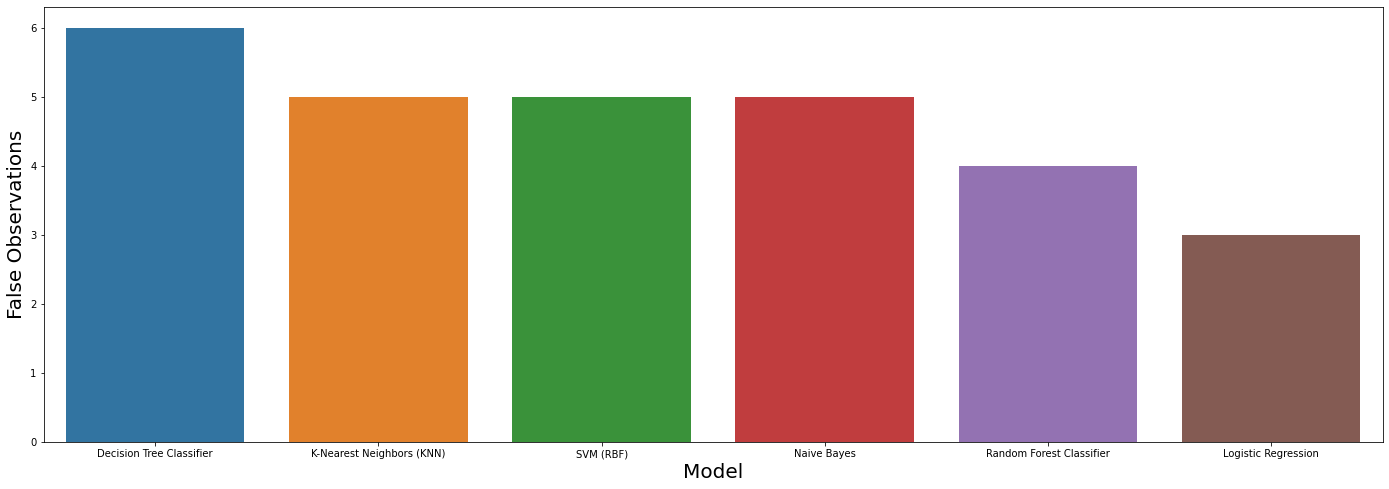

In [ ]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe )
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

In this project, We have built 7 classification models using Breast cancer Dataset. They are naive bayes, logistic, knn, svm(linear), svm(rbf), decision tree and random forest. Then the performance of the models have been measured and visualized.

